# Image Processing Lab 4
Dr. Amr Amin  
Ahmed Alqassas  
Autumn 2024-25

# Smoothing (or Blurring) Filters
| Filter | Purpose                                                                                        |
|:-------|:-----------------------------------------------------------------------------------------------|
|Median  |Reduces **salt-and-pepper\* noise** by replacing each pixel with the median of its neighborhood.|
|Mean    |Averages neighboring pixels to create a simple blurring effect.                                 |
|Gussian |Reduces high-frequency noise, creating a general blurring effect.                               |


[Read more about types of noises in images](https://medium.com/@Coursesteach/computer-vision-part-14-common-types-of-noise-7e6507cc763c)   
[How Blurs & Filters Work - Computerphile](https://www.youtube.com/watch?v=C_zFhWdM4ic) 
> **Salt-and-pepper noise** is a type of image noise where random pixels are either very bright or very dark.
  
> This noise appears as small white and black dots scattered throughout the image. [Check this example](https://en.wikipedia.org/wiki/Salt-and-pepper_noise#/media/File:Noise_salt_and_pepper.png)  

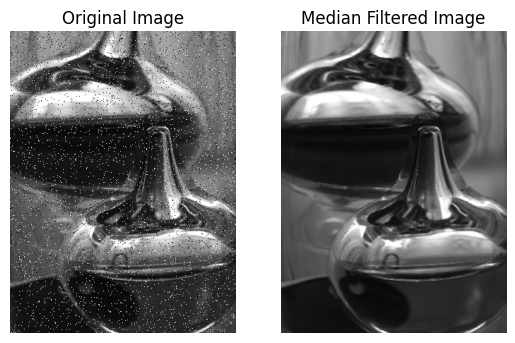

In [ ]:
from skimage import io
from skimage import filters

import matplotlib.pyplot as plt

image = io.imread('Noise_salt_and_pepper.png', as_gray=True)
smoothed_image = filters.median(image)

titles = ['Original Image', 'Median Filtered Image']

fig, ax = plt.subplots(1, 2)

ax[0].imshow(image, cmap='gray')
ax[1].imshow(smoothed_image, cmap='gray')
for i in range(len(ax)):
    ax[i].axis('off')
    ax[i].set_title(titles[i])

plt.show()

# Median, Mean and Gaussian Filters

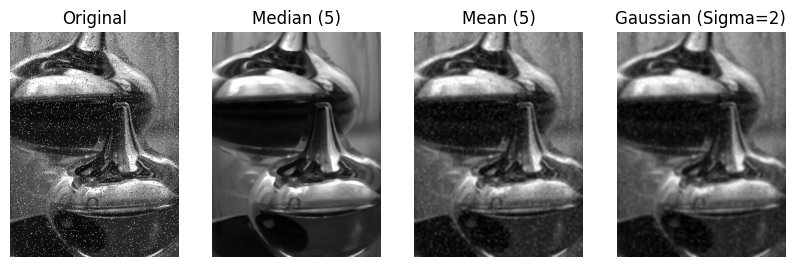

In [12]:
from skimage import io, filters
from skimage.morphology import square
import matplotlib.pyplot as plt

footprint = square(5)
image = io.imread('Noise_salt_and_pepper.png', as_gray=True)

smoothed_median = filters.median(image, footprint)
smoothed_mean = filters.rank.mean(image, footprint) # Image dtype must be uint8, if not use util.img_as_ubyte to convert it first
smoothed_gaussian = filters.gaussian(image, sigma=2) # Higher sigma means more blurring

fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(smoothed_median, cmap='gray')
ax[2].imshow(smoothed_mean, cmap='gray')
ax[3].imshow(smoothed_gaussian, cmap='gray')

titles = ['Original', 'Median (5)', 'Mean (5)', 'Gaussian (Sigma=2)']
for i in range(len(ax)):
               ax[i].set_title(titles[i])
               ax[i].axis('off')

plt.tight_layout
plt.show()

# Edge Detection Filters
Edge detection is a fundamental image processing technique for identifying and locating the boundaries or edges of objects in an image.   
 
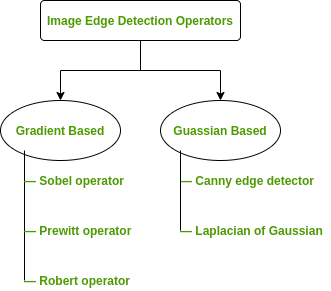  

- Sobel, Scharr, Prewitt: These filters work by detecting the gradient in intensity, producing a bright line where the gradient is steepest.  
- Roberts: Detects diagonal edges but can be more sensitive to noise.  
- Canny: The Canny method is a more complex edge detector, to produce a cleaner edge image.  
> Each filter has strengths suited to different applications, from simple edge highlights (Sobel) to more detailed edge maps (Canny).  


| Filter | Purpose                                                                                                                                           |
|:-------|:--------------------------------------------------------------------------------------------------------------------------------------------------|
|Sobel   |Highlights edges by calculating the gradient of image intensity in both horizontal and vertical directions.                                        |
|Scharr  |Detects edges by approximating the gradient, emphasizing vertical and horizontal edges.                                                            |
|Prewitt |Reduces high-frequency noise, creating a general blurring effect.                                                                                  |
|Roberts |Detects edges using diagonal gradients, often resulting in sharper edges but more sensitive to noise.                                              |
|Canny   |A multi-step edge detection process (gradient calculation, non-maximum suppression, and hysteresis thresholding), producing highly accurate edges. |


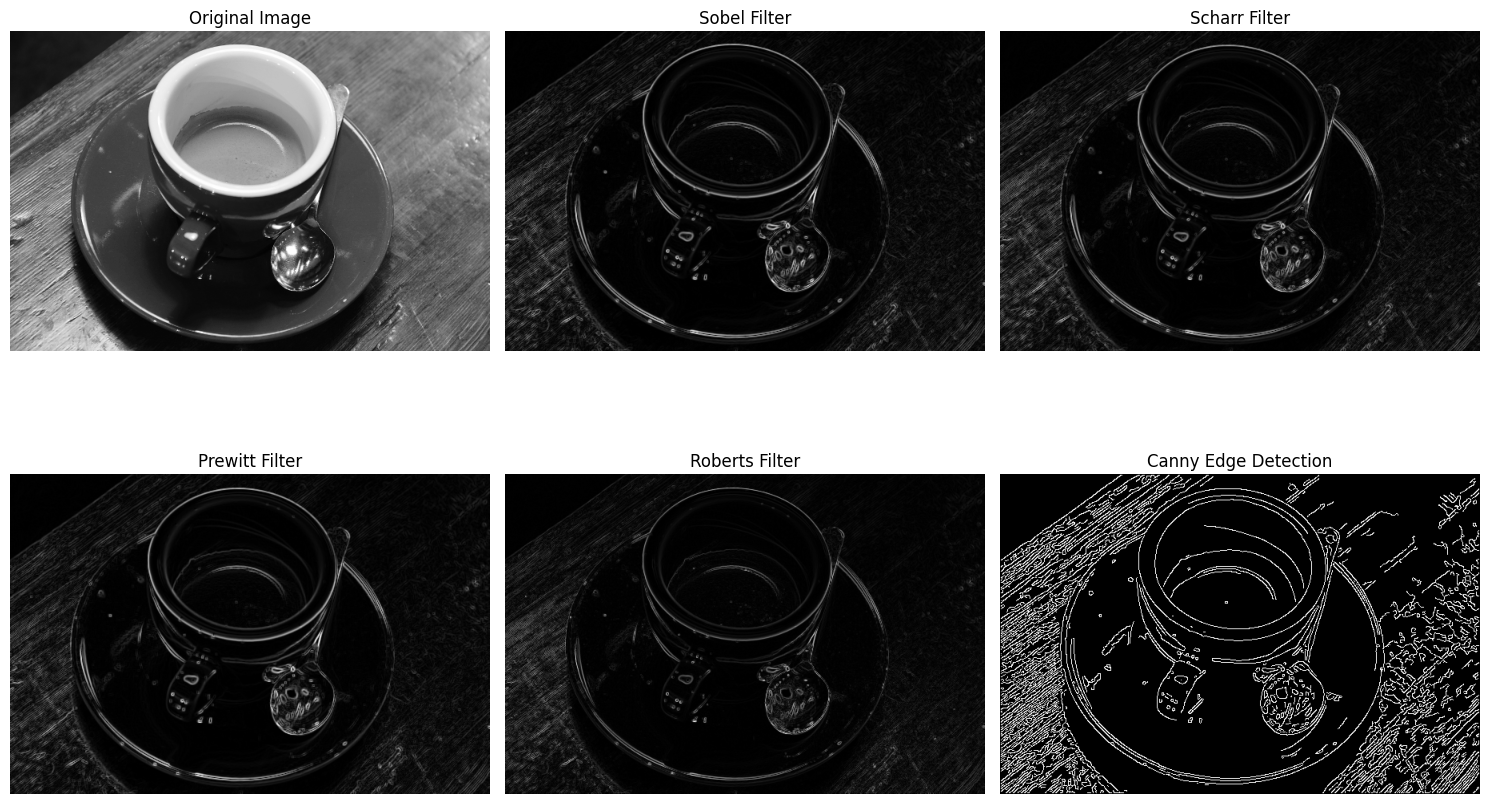

In [13]:
import matplotlib.pyplot as plt
from skimage import data, filters, feature
from skimage.color import rgb2gray

image = rgb2gray(data.coffee())

sobel_edges = filters.sobel(image)
scharr_edges = filters.scharr(image)
prewitt_edges = filters.prewitt(image)
roberts_edges = filters.roberts(image)
canny_edges = feature.canny(image, sigma=1) # From feature module

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(sobel_edges, cmap='gray')
ax[1].set_title("Sobel Filter")

ax[2].imshow(scharr_edges, cmap='gray')
ax[2].set_title("Scharr Filter")

ax[3].imshow(prewitt_edges, cmap='gray')
ax[3].set_title("Prewitt Filter")

ax[4].imshow(roberts_edges, cmap='gray')
ax[4].set_title("Roberts Filter")

ax[5].imshow(canny_edges, cmap='gray')
ax[5].set_title("Canny Edge Detection")

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


[Edge detection applications](https://www.mathworks.com/discovery/image-segmentation.html)  

# Quiz + Discussion
Datatypes: https://scikit-image.org/docs/stable/user_guide/data_types.html


The shape of RGB image is:(512, 512, 3)

the shape of grayscale image is:(512, 512)

The dtype of RGB image is: uint8

The dtype of grayscale image is: float64

levels of RGB image: 256 levels

Maximum levels of grayscale image: 18446744073709551616 levles

The true number of levels in grayscale image = 112094 levels

Storage size of RGB (uint8) = 6291456 bits

Storage size of grayscale (float64) = 16777216 bits


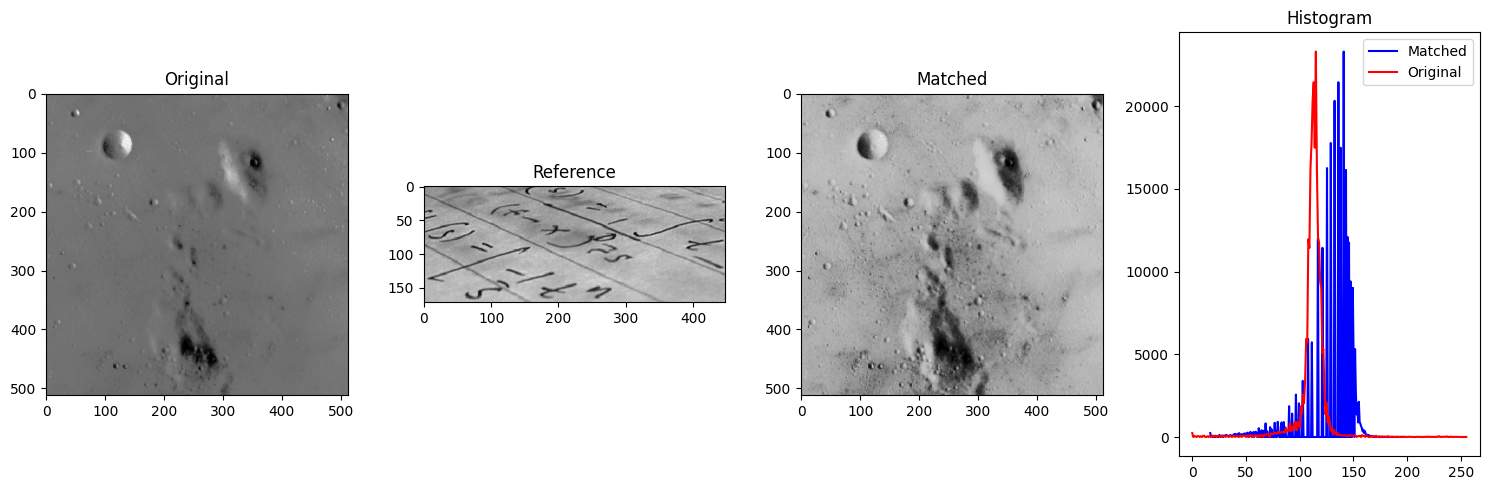

In [ ]:
from skimage import data, color, exposure
import matplotlib.pyplot as plt
import numpy as np

# 1 Convert an RGB image into grayscale image. Don’t plot
img = data.astronaut()
gray_image = color.rgb2gray(img)

# 2 Print the shape, number of intensity levels of both RGB and grayscale image.
print(f'The shape of RGB image is:{img.shape}')
print(f'\nthe shape of grayscale image is:{gray_image.shape}')

"""
Levels = 2^bitdepth
to find the bit-depth we use dtype such that:
uint8   ->  8 bits
unit16  -> 16 bits
float32 -> 32 bits
float64 -> 64 bits

Read more here: https://scikit-image.org/docs/stable/user_guide/data_types.html
"""
print(f'\nThe dtype of RGB image is: {img.dtype}') #uint8
print(f'\nThe dtype of grayscale image is: {gray_image.dtype}') #float64

print(f'\nlevels of RGB image: {2**8} levels')
print(f'\nMaximum levels of grayscale image: {2**64} levles') 
# Note: (this is not completely accurate) as float64 shall be used for more precise values, too. The true numeber of levels is calculated below:
print(f'\nThe true number of levels in grayscale image = {len(np.unique(gray_image))} levels')

# 3 Calculate the storage size of both images in bits.
"""
Storage size = Height * Width * Channels * bit-depth
"""
print(f'\nStorage size of RGB (uint8) = {img.shape[0]*img.shape[1]*img.shape[2]*8} bits')
print(f'\nStorage size of grayscale (float64) = {img.shape[0]*img.shape[1]*64} bits')

# 4 Apply  histogram matching on two grayscale images.
image = data.moon()
reference = data.text()
matched = exposure.match_histograms(image, reference)

# 5 Use exposure to find the histogram of the matched image.
hist, hist_bins = exposure.histogram(matched)
h, b = exposure.histogram(image)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")

ax[1].imshow(reference, cmap='gray')
ax[1].set_title("Reference")

ax[2].imshow(matched, cmap='gray')
ax[2].set_title("Matched")

ax[3].plot(hist_bins, hist, color='b', label='Matched')
ax[3].plot(b, h, color='r', label='Original')
ax[3].set_title("Histogram")
ax[3].legend()

fig.tight_layout()
plt.show()
